In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from myfunctions import set_importer, scores
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")
%matplotlib inline

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

In [2]:
# import X_train_encoded, X_test_encoded, y_train and y_test
X_train = set_importer('../analysis-dfs/X_train_prepared.csv')
X_test = set_importer('../analysis-dfs/X_test_prepared.csv')

y_train = set_importer('../analysis-dfs/y_train_prepared.csv', y=True)
y_test = set_importer('../analysis-dfs/y_test_prepared.csv', y=True)

display(X_train.shape)
X_train.head(10)

(29852, 47)

,gps_height,longitude,latitude,region_code,district_code,population,permit,construction_year,basin_lake nyasa,basin_lake rukwa,basin_lake tanganyika,basin_lake victoria,basin_pangani,basin_rufiji,basin_ruvuma / southern coast,basin_wami / ruvu,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,quantity_group_enough,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,-0.356274,1.723728,-1.640197,-0.393261,-0.194167,1.366671,0.66262,0.801349,-0.272276,-0.24457,-0.36545,-0.484293,-0.398664,-0.340700,3.031980,-0.334300,-0.535902,-0.277124,-0.493551,-0.072457,2.973812,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,-0.335648,-0.342545,-0.241720,-0.463142,-0.048039,0.476945,-0.116884,-0.330131,-0.256843,-0.859927,-0.597177,-0.258207,-0.143441,-0.528430,-0.070874,0.918978,-0.569677,-0.090922,-0.505487
1,-0.884573,-0.348901,-1.036569,-0.240379,0.092932,-0.675954,0.66262,-1.231119,-0.272276,-0.24457,-0.36545,-0.484293,-0.398664,2.935134,-0.329817,-0.334300,-0.535902,-0.277124,-0.493551,-0.072457,-0.336269,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,2.979315,-0.342545,-0.241720,-0.463142,-0.048039,0.476945,-0.116884,-0.330131,-0.256843,-0.859927,1.674545,-0.258207,-0.143441,1.892397,-0.070874,0.918978,-0.569677,-0.090922,-0.505487
2,-0.884573,-0.267184,-1.007222,-0.240379,0.092932,-0.675954,0.66262,-1.231119,-0.272276,-0.24457,-0.36545,-0.484293,-0.398664,2.935134,-0.329817,-0.334300,-0.535902,-0.277124,-0.493551,-0.072457,-0.336269,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,-0.335648,-0.342545,-0.241720,-0.463142,-0.048039,0.476945,-0.116884,-0.330131,-0.256843,-0.859927,-0.597177,3.872867,-0.143441,1.892397,-0.070874,0.918978,-0.569677,-0.090922,-0.505487
3,-0.693453,1.097498,-0.507180,-0.597103,-0.385566,1.025095,0.66262,0.816731,-0.272276,-0.24457,-0.36545,-0.484293,-0.398664,-0.340700,-0.329817,2.991328,-0.535902,-0.277124,2.026134,-0.072457,-0.336269,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,2.979315,-0.342545,-0.241720,-0.463142,-0.048039,-2.096678,-0.116884,3.029097,-0.256843,-0.859927,1.674545,-0.258207,-0.143441,-0.528430,-0.070874,-1.088165,-0.569677,-0.090922,1.978290
4,0.993994,-0.536809,1.177516,0.167305,-0.194167,1.366671,-1.50916,0.828011,-0.272276,-0.24457,-0.36545,2.064866,-0.398664,-0.340700,-0.329817,-0.334300,-0.535902,-0.277124,2.026134,-0.072457,-0.336269,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,-0.335648,-0.342545,-0.241720,2.159167,-0.048039,-2.096678,-0.116884,-0.330131,3.893431,-0.859927,-0.597177,-0.258207,6.971490,-0.528430,-0.070874,-1.088165,-0.569677,-0.090922,1.978290
5,0.933395,-0.798928,1.241827,0.116345,-0.481266,2.732976,0.66262,0.815706,-0.272276,-0.24457,-0.36545,2.064866,-0.398664,-0.340700,-0.329817,-0.334300,-0.535902,-0.277124,2.026134,-0.072457,-0.336269,-0.048039,-0.115144,-0.162114,-0.113125,0.345098,-0.129342,-0.185442,-0.335648,-0.342545,-0.241720,-0.463142,-0.048039,0.476945,-0.116884,-0.330131,-0.256843,-0.859927,1.674545,-0.258207,-0.143441,-0.528430,-0.070874,-1.088165,-0.569677,-0.090922,1.978290
6,-0.884573,-1.349221,1.396173,0.065384,-0.385566,-0.675954,0.66262,-1.231119,-0.272276,-0.24457,-0.36545,2.064866,-0.398664,-0.340700,-0.329817,-0.334300,1.866013,-0.277124,-0.493551,-0.072457,-0.3362

# Building a baseline model

In [3]:
knn_baseline_model = KNeighborsClassifier()

knn_baseline_log_loss = -cross_val_score(knn_baseline_model, X_train, y_train, scoring="neg_log_loss").mean()
knn_baseline_log_loss

1.027668594875528

This clearly is a high log loss compared to previous models best log losses. Hence I will carry an iterative approach to find the best KNN model

# Building iterative models to find the best KNN

## n_neighbors

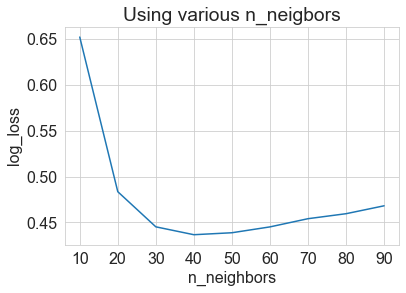

In [5]:
neighbors = np.arange(10, 100, 10)

log_loss_means = []

for neighbor in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=neighbor)
    log_loss_means.append( -cross_val_score(knn_model, X_train, y_train, scoring='neg_log_loss').mean() )

plt.plot(neighbors, log_loss_means)
plt.xlabel('n_neighbors')
plt.xticks(neighbors)
plt.ylabel('log_loss')
plt.title('Using various n_neigbors')
plt.show() 

The n_neighbors which produced a less log loss is 40

## n_neighbors

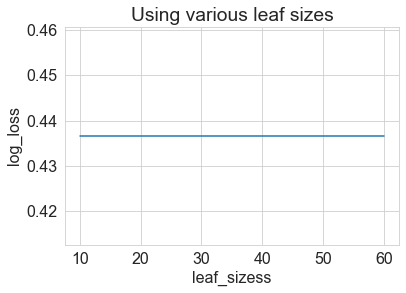

In [4]:
leaf_sizes = np.arange(10, 70, 10)

log_loss_means = []

for leaf_size in leaf_sizes:
    knn_model = KNeighborsClassifier(n_neighbors=40, leaf_size=leaf_size)
    log_loss_means.append( -cross_val_score(knn_model, X_train, y_train, scoring='neg_log_loss').mean() )

plt.plot(leaf_sizes, log_loss_means)
plt.xlabel('leaf_sizess')
plt.xticks(leaf_sizes)
plt.ylabel('log_loss')
plt.title('Using various leaf sizes')
plt.show() 

Leaf size has has no effect on the log loss

## n_neighbors

Using various metric distances

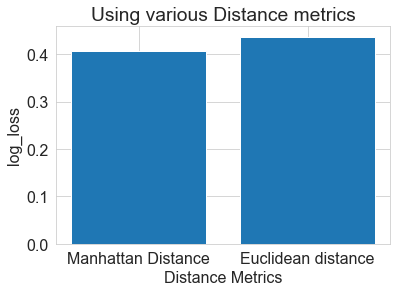

In [5]:
# Using a various distance metrics
# 1 for Manhattan distance
# 2 for euclidean distance
powers = [1,2]
log_loss_means = []

for p in powers:
    knn_model = KNeighborsClassifier(n_neighbors=40, p=p)
    log_loss_means.append( -cross_val_score(knn_model, X_train, y_train, scoring='neg_log_loss').mean() )

plt.bar(powers, log_loss_means)
plt.xticks(powers, ['Manhattan Distance', 'Euclidean distance'])
plt.xlabel('Distance Metrics')
plt.ylabel('log_loss')
plt.title('Using various Distance metrics')
plt.show()

Manhattan Distance produced a lesser log loss compared to euclidean distance.

## weights

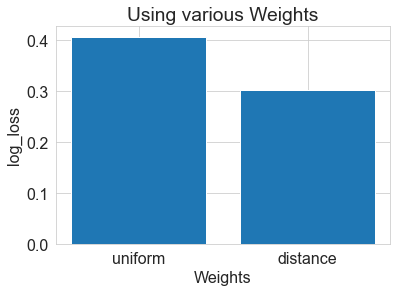

In [9]:
# Using a different weight options
weights = ['uniform', 'distance']
log_loss_means = []

for weight in weights:
    knn_model = KNeighborsClassifier(n_neighbors=40, p=1, weights=weight)
    log_loss_means.append( -cross_val_score(knn_model, X_train, y_train, scoring='neg_log_loss').mean() )

plt.bar(weights, log_loss_means)
plt.xticks(weights)
plt.xlabel('Weights')
plt.ylabel('log_loss')
plt.title('Using various Weights')
plt.show()

A weight of distance seemed to have performed well, producing a lesser log loss.

## algorithm

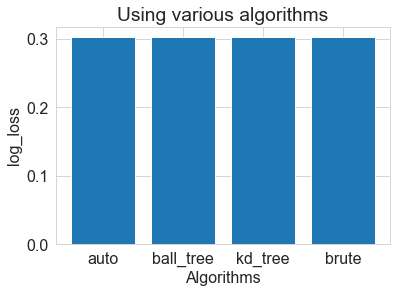

In [10]:
# Using a different algorithm options
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
log_loss_means = []

for algorithm in algorithms:
    knn_model = KNeighborsClassifier(n_neighbors=40, p=1, weights='distance', algorithm=algorithm)
    log_loss_means.append( -cross_val_score(knn_model, X_train, y_train, scoring='neg_log_loss').mean() )

plt.bar(algorithms, log_loss_means)
plt.xticks(algorithms)
plt.xlabel('Algorithms')
plt.ylabel('log_loss')
plt.title('Using various algorithms')
plt.show()

All algorithms have no effect hencewill stick to the default algorithms.

## Best KNN model

In [12]:
# intializing a knn model with the best parameters and fitting it.
best_knn_model = KNeighborsClassifier(n_neighbors=40, p=1, weights='distance')
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40, p=1, weights='distance')

In [13]:
y_test_bknn = best_knn_model.predict(X_test)
y_test_bag_bknn = best_knn_model.predict_proba(X_test)[:, 1]
print('KNN Classifier best model results on the test set')
scores(y_test, y_test_bknn, y_test_bag_bknn)

KNN Classifier best model results on the test set
The precision score is:	 0.8952855847688124
The recall score is:	 0.30544386019177233
The accuracy score is:	 0.3808025177025964
The log loss is:	 2.5282383959618917
The auc is:		 0.5727277696598654
